### Linear Regression
- f(x) = wx + b
- 예측함수를 통해 예측값과 실제값의 차이를 계산
- cost(w, b) : 업데이트를 통해 w, b값을 조정함
- 위 과정을 특정 횟수만큼 반복
- 수정된 값을 통해 f(x) = wx + b 정의




- 독립변수(feature), 종속변수(target)
- 독립변수가 종속변수의 미치는 영향
- 독립변수의 갯수에 따라 단일회귀분석, 다중회귀분석으로 나뉨
- 다중회귀분석은 독립변수간의 상관관계를 고려해야함

In [38]:
# linear reggres
from sklearn.linear_model import LinearRegression

# model selection
from sklearn.model_selection import train_test_split 

# pandas, numpy, seaborn, 시각화
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 시각화
import missingno as ms
%matplotlib inline

# 경고문구
import warnings
warnings.filterwarnings('ignore')

### 키에 따른 몸무게

In [3]:
df = pd.DataFrame({
'height': [1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83],
'mass': [52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29, 63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46],
})

df

,height,mass
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [5]:
# 독립변수
X = df[['height']]
X

,height
0,1.47
1,1.50
2,1.52
3,1.55
4,1.57
5,1.60
6,1.63
7,1.65
8,1.68
9,1.70


In [6]:
# 종속변수
Y = df[['mass']]
Y

,mass
0,52.21
1,53.12
2,54.48
3,55.84
4,57.20
5,58.57
6,59.93
7,61.29
8,63.11
9,64.47


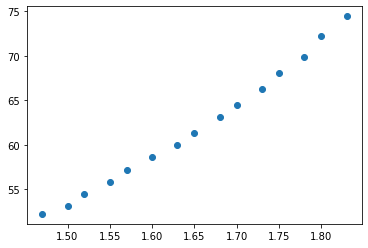

In [7]:
plt.figure()

plt.plot(X, Y, 'o')

plt.show()
plt.close()

In [8]:
test_model = LinearRegression()
test_model.fit(X, Y)

LinearRegression()

In [10]:
# 예측 : 키를 넣으면 몸무게가 나옴
test_model.predict([[1.55]])

array([[55.90993322]])

In [16]:
# 기울기
print('coefficient = ', test_model.coef_)

# 절편
print('intercept = ', test_model.intercept_)

# R : 결정계수
print('R = ', test_model.score(X, Y))

coefficient =  [[61.27218654]]
intercept =  [-39.06195592]
R =  0.9891969224457968


In [17]:
# 예측값 풀어보기
(61.27218654 * 1.55) + -39.06195592

55.909933217

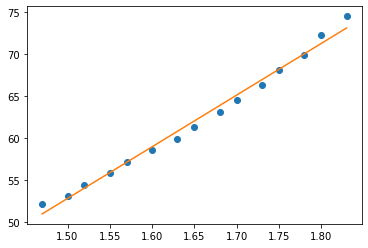

In [15]:
# 최적의 회귀선 시각화
plt.figure()

plt.plot(X, Y, 'o')
plt.plot(X, test_model.predict(X))

plt.show()
plt.close()

### 온도에 따른 주문량

In [19]:
tempDF = pd.read_csv('https://raw.githubusercontent.com/jmnote/z-dataset/master/simple-regression/iced-tea-orders.csv')              
tempDF

,date,weekday,high_temperature,order
0,2002-07-22,Mon,29,77
1,2002-07-23,Tue,28,62
2,2002-07-24,Wed,34,93
3,2002-07-25,Thr,31,84
4,2002-07-26,Fri,25,59
5,2002-07-27,Sat,29,64
6,2002-07-28,Sun,32,80
7,2002-07-29,Mon,31,75
8,2002-07-30,Tue,24,58
9,2002-07-31,Wed,33,91


In [21]:
# 독립변수
X = tempDF[['high_temperature']]
X

,high_temperature
0,29
1,28
2,34
3,31
4,25
5,29
6,32
7,31
8,24
9,33


In [22]:
# 종속변수
Y = tempDF[['order']]
Y

,order
0,77
1,62
2,93
3,84
4,59
5,64
6,80
7,75
8,58
9,91


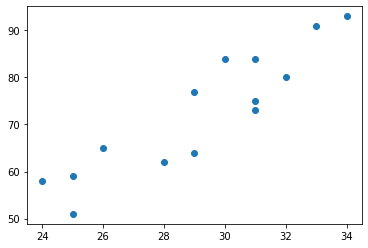

In [23]:
plt.figure()

plt.plot(X, Y, 'o')

plt.show()
plt.close()

In [24]:
tempDF_model = LinearRegression()
tempDF_model.fit(X, Y)

LinearRegression()

In [31]:
# 예측 : 온도를 넣으면 주문량이 나옴
tempDF_model.predict([[40]])

array([[113.15418502]])

In [26]:
# 기울기
print('coefficient = ', tempDF_model.coef_)

# 절편
print('intercept = ', tempDF_model.intercept_)

# R : 결정계수
print('R = ', tempDF_model.score(X, Y))

coefficient =  [[3.73788546]]
intercept =  [-36.36123348]
R =  0.8225092881166944


In [28]:
# 예측값 풀어보기
(3.73788546 * 40) + -36.36123348

113.15418492

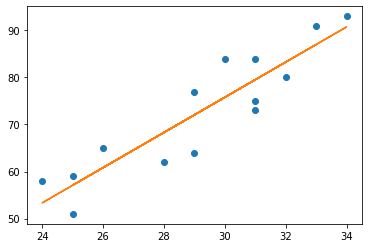

In [29]:
# 최적의 회귀선 시각화
plt.figure()

plt.plot(X, Y, 'o')
plt.plot(X, tempDF_model.predict(X))

plt.show()
plt.close()

### manhattan 주택 임대료(다중)

In [32]:
houseDF = pd.read_csv('../data/manhattan.csv')
houseDF.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [53]:
X = houseDF[['bedrooms','bathrooms','size_sqft','min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck']]
Y = houseDF['rent']

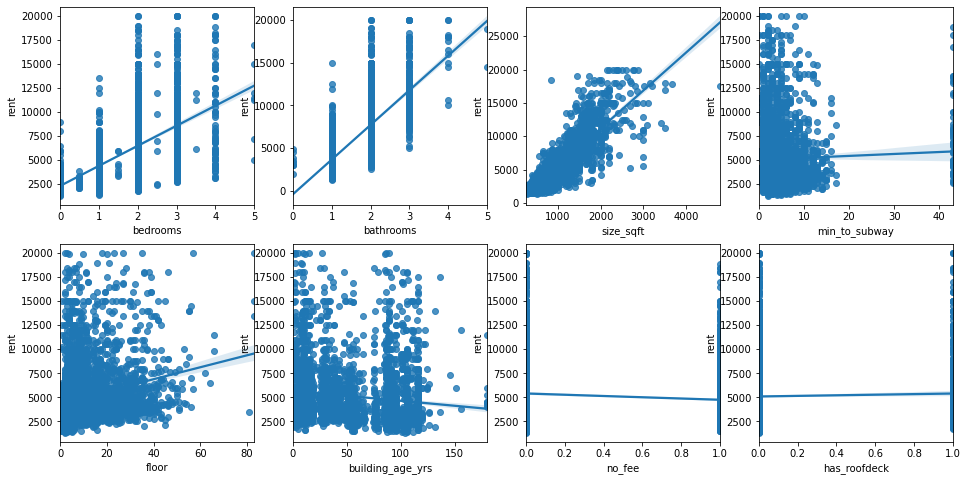

In [54]:
# 상관분석 시각화
fig , axs = plt.subplots(figsize=(16, 8) , ncols=4 , nrows=2)
for i, feature in enumerate(X) :
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature , y='rent' , data=houseDF , ax = axs[row][col])

In [55]:
X_train , X_test , y_train , y_test = train_test_split(X,Y, test_size=.2 , random_state = 100)

In [56]:
price_model = LinearRegression()
price_model.fit(X_train , y_train) 

LinearRegression()

In [57]:
# 렌트요금 예측 : [['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck']]
my_apt = [2 , 1 , 620 , 10 , 11, 5 , 0, 0]
y_pred = price_model.predict([my_apt])
y_pred

array([3243.81895511])

In [59]:
y_pred = price_model.predict(X_test)
y_pred

array([ 3840.64309488,  3360.24914009,  4323.02145803,  2061.95605844,
        3756.18526504,  2632.04506095, 13224.56329548,  2555.12699916,
        5953.4257522 ,  4059.95244586,  4115.47339142,  7660.00928729,
        6059.04875514,  2573.80323417, 11397.0245667 ,  5822.40521776,
        1727.38071303,  3349.33670525,  3504.23594981,  2687.77343033,
        9529.88637798,  3520.8536494 ,  2018.54028461,  5066.47785641,
        8084.44215755,  4096.70936032,  3706.35740495,  3795.98037355,
        2382.75733217,  7530.71590682,  5053.1661762 ,  6880.73452448,
        3829.61760117,  7013.7111041 ,  6165.08522042,  7894.52115911,
        3951.56904647,  1880.95128518,  2935.01856899,  6400.71493297,
        8359.60527956,  4011.05552304,  2636.03055238,  5025.50377856,
        5846.79380424,  3730.08636179,  2297.39863446,  8426.57413273,
        4891.18837622, 11581.03933096,  3654.96382471,  3495.93355771,
        3795.98037355,  3813.41588245,  4261.30818193,  6189.14882042,
      

In [60]:
y_test

1590    3000
68      3483
309     6000
2387    3495
1547    2995
        ... 
1027    1899
2893    3276
1204    7500
1301    7500
1354    5220
Name: rent, Length: 708, dtype: int64

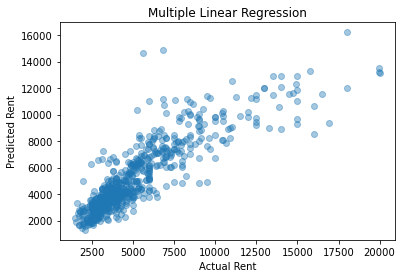

In [61]:
# x 실제 임대료 , y 예측 임대료
plt.scatter(y_test , y_pred , alpha=0.4)

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Multiple Linear Regression')

plt.show()
plt.close()

In [62]:
# 기울기
print('coefficient = ', price_model.coef_)

# 절편
print('intercept = ', price_model.intercept_)

# R : 결정계수
print('R = ', price_model.score(X, Y))

coefficient =  [-300.52919496 1192.10549966    4.88307277  -12.79754768   23.48302733
   -7.24474067 -109.83894129   26.29631795]
intercept =  -468.84739082357646
R =  0.7787428579945472


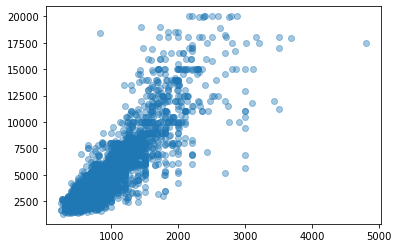

In [63]:
# 평수에 따른 렌트요금
plt.scatter(houseDF[['size_sqft']], houseDF[['rent']], alpha=0.4)
plt.show()
plt.close()